In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

%matplotlib inline

In [2]:
def ScatterPlot(X, Y, assignments=None, centers=None):
  if assignments is None:
    assignments = [0] * len(X)
  fig = plt.figure(figsize=(14,8))
  cmap = ListedColormap(['red', 'green', 'blue', 'magenta'])
  plt.scatter(X, Y, c=assignments, cmap=cmap)
  if centers is not None:
    plt.scatter(centers[:, 0], centers[:, 1], c=range(len(centers)), 
                marker='+', s=400, cmap=cmap)  
  plt.xlabel('Height (in)')
  plt.ylabel('Weight (lbs)')
  plt.show()

### Data

Weight and height data obtained from [SOCR Data Dinov 020108 HeightsWeights](http://wiki.stat.ucla.edu/socr/index.php/SOCR_Data_Dinov_020108_HeightsWeights)

   Height  Weight
0   65.78  112.99
1   71.52  136.49
2   69.40  153.03
3   68.22  142.34
4   67.79  144.30


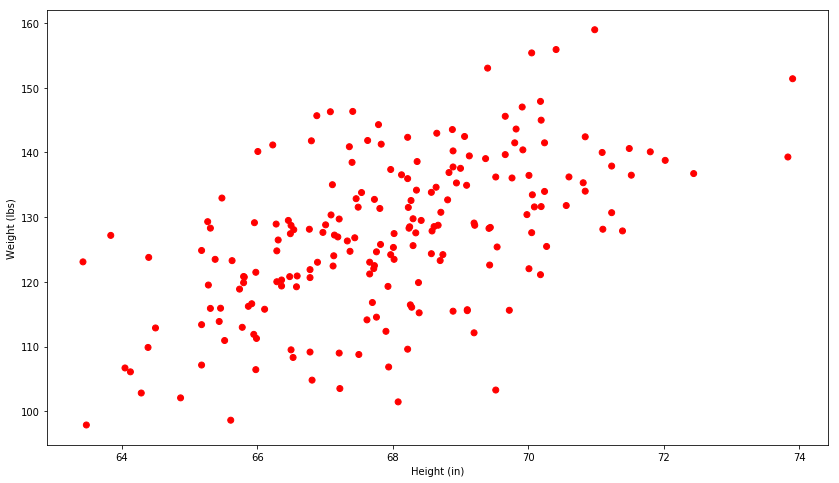

In [3]:
hw_frame = pd.read_csv(
  './hw-data.txt', delim_whitespace=True,
  header=None, names=['Index', 'Height', 'Weight'])
hw_frame.drop('Index', 1, inplace=True)
print hw_frame.head(5)
  
ScatterPlot(hw_frame.Height, hw_frame.Weight)

In [4]:
def input_fn():
  return tf.constant(hw_frame.as_matrix(), tf.float32, hw_frame.shape), None

In [5]:
tf.logging.set_verbosity(tf.logging.ERROR)
kmeans = tf.contrib.learn.KMeansClustering(num_clusters=4, relative_tolerance=0.0001)
_ = kmeans.fit(input_fn=input_fn)

In [6]:
clusters = kmeans.clusters()
assignments = list(kmeans.predict_cluster_idx(input_fn=input_fn))

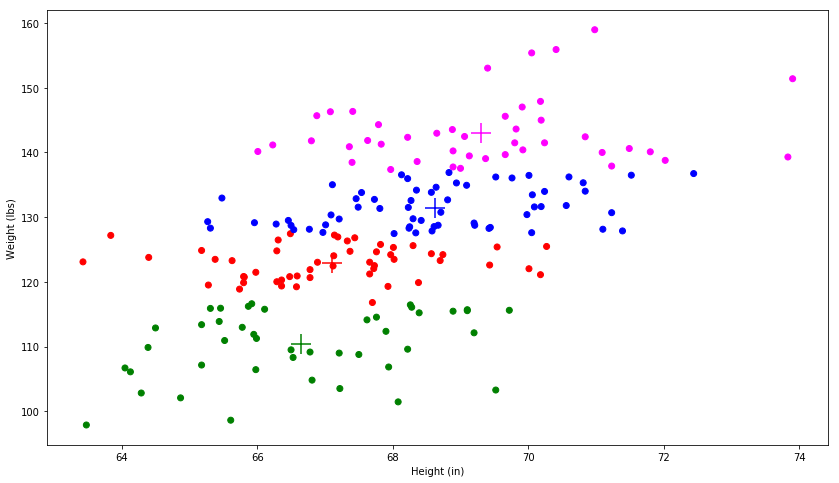

In [7]:
ScatterPlot(hw_frame.Height, hw_frame.Weight, assignments, clusters)